In [1]:
import numpy as np
from numpy.linalg import inv
import pandas as pd
import matplotlib.pyplot as plt

Load the training set.

In [2]:
training_data = pd.read_csv('quasar_train.csv')

Implement the (unweighted) linear regression using normal equation approach.

In [3]:
def linear_reg(X, y):
    '''
    Input:  design matrix X, of dimension mx2
            vector of response variable y, of dimension mx1
    Output: fitted parameter vector theta, of dimension 2x1
    '''
    theta = np.matmul(inv(np.matmul(X.T, X)), np.matmul(X.T, y))
    return theta

In [4]:
y = np.array(training_data.iloc[[0]]).T

In [5]:
X = np.zeros((len(training_data.columns), 2))
X[:,0] = 1   # all elements of the first column of X are 1
X[:,1] = np.array(training_data.columns.values).astype(float)

In [6]:
theta = linear_reg(X, y)

Display the value of fitted parameters.

In [7]:
print(theta)

[[ 2.51339906e+00]
 [-9.81122145e-04]]


Visualize the data points and the regression line.

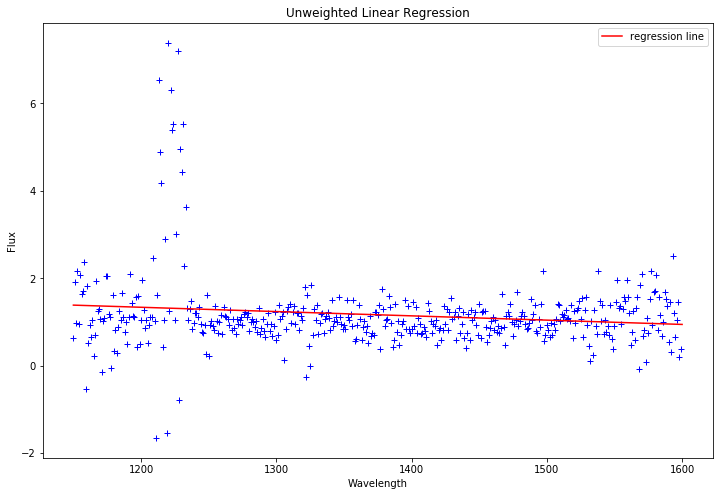

In [8]:
fig = plt.figure(1, figsize=(12,8))

# Construct the regression line
slope = theta[1]
intercept = theta[0]
x_line = np.linspace(1150,1600,2)   # num = 2 is sufficient to plot a straight line 
y_line = slope * x_line + intercept

# Plot the data points and regression line
plt.plot(X[:,1], y, 'b+')
plt.plot(x_line, y_line, '-r', label = 'regression line')

# Other settings
plt.xlabel('Wavelength')
plt.ylabel('Flux')
plt.title('Unweighted Linear Regression')
plt.legend(loc = 'upper right')
plt.show()

###################################################################################################################

In [9]:
import LOESS

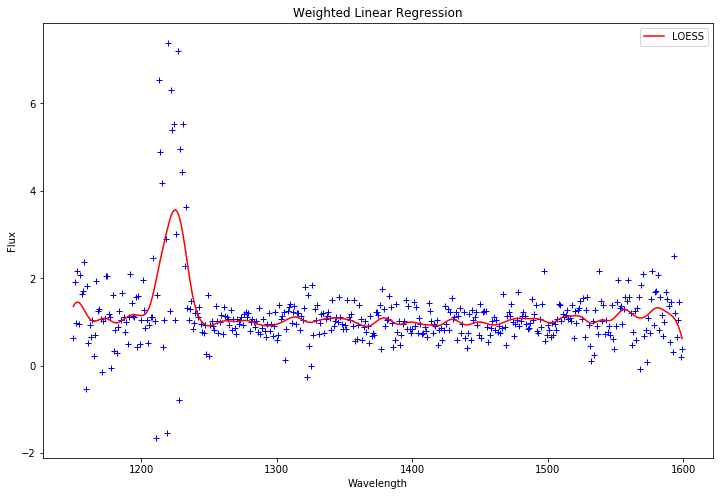

In [10]:
fig = plt.figure(1, figsize=(12,8))
x_line = X[:,1]

# Plot the data points and regression line
plt.plot(X[:,1], y, 'b+')
y_line = LOESS.locally_weighted_linear_reg(x = x_line, X = X, y = y, tau = 5)
plt.plot(x_line, y_line, color = 'red', label = 'LOESS')

# Other settings
plt.xlabel('Wavelength')
plt.ylabel('Flux')
plt.title('Weighted Linear Regression')
plt.legend(loc = 'upper right')
plt.show()

###################################################################################################################

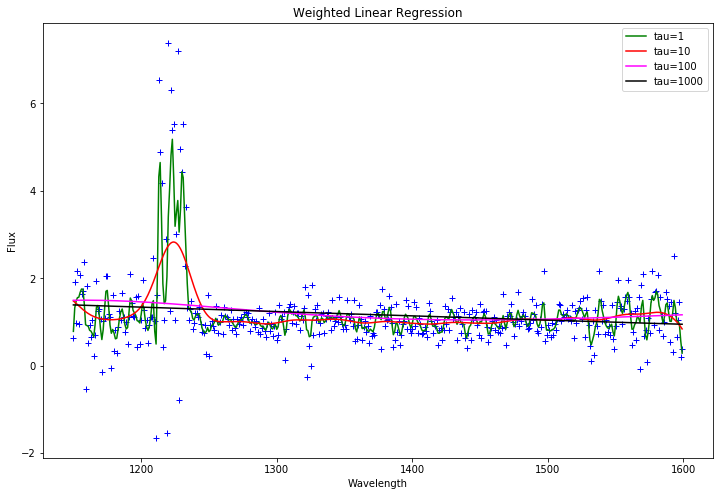

In [11]:
fig = plt.figure(1, figsize=(12,8))
x_line = X[:,1]
bandwidth_parameters = {1:'green', 10:'red', 100:'magenta', 1000:'black'}

# Plot the data points and regression line
plt.plot(X[:,1], y, 'b+')
for tau in bandwidth_parameters.keys():
    y_line = LOESS.locally_weighted_linear_reg(x = x_line, X = X, y = y, tau = tau)
    plt.plot(x_line, y_line, color = bandwidth_parameters[tau], label = 'tau='+str(tau))

# Other settings
plt.xlabel('Wavelength')
plt.ylabel('Flux')
plt.title('Weighted Linear Regression')
plt.legend(loc = 'upper right')
plt.show()

As tau (the bandwidth parameter) is smaller, it tends to overfit the data. In contrast, as tau gets larger, it becomes closer to an unweighted linear regression.